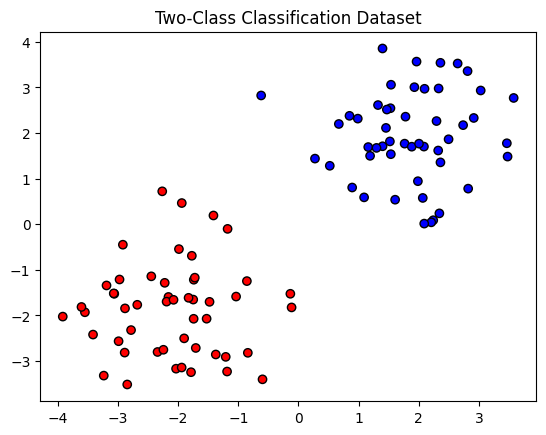

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

# Generate sample data (two clusters)
np.random.seed(42)
X1 = np.random.randn(50, 2) + [2, 2]  # Cluster 1
X2 = np.random.randn(50, 2) + [-2, -2]  # Cluster 2
X = np.vstack([X1, X2])  # Combine data
y = np.array([0] * 50 + [1] * 50)  # Labels

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("Two-Class Classification Dataset")
plt.show()


### Step 1: Select Centers using K-Means

In [2]:
k = 10
k_means = KMeans(n_clusters=k).fit(X)
centers = k_means.cluster_centers_

C:\Users\sunny\.conda\envs\torch_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Step 2: Compute RBF Activations

In [3]:
def gaussian_rbf(x, c, sigma = 1.0):
    return np.exp(-np.linalg.norm(x - c, axis = 1)**2 / (2 * sigma ** 2))

# compute activations
sigma = 1.0    # spread
G = np.array([gaussian_rbf(X, c, sigma) for c in centers]).T

### Step 3: Compute Weights for Output Layer

In [4]:
# Solve for output weights using least squares
W = np.linalg.pinv(G).dot(y)


### Step 4: Make Predictions

In [5]:
y_pred = G.dot(W)
y_pred = np.round(y_pred)  # Convert to binary classification

# Accuracy
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 98.00%


### Visualizing RBF Functions

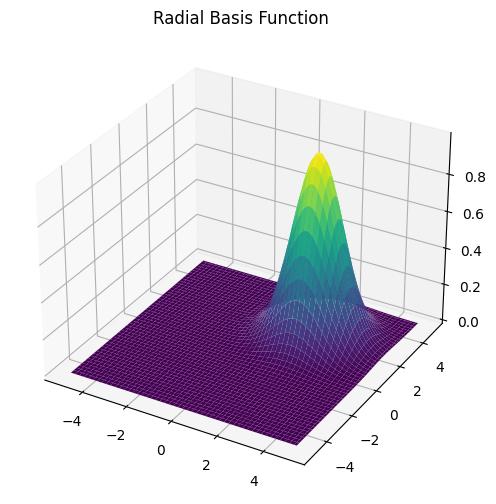

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create mesh grid
x_range = np.linspace(-5, 5, 100)
y_range = np.linspace(-5, 5, 100)
X_mesh, Y_mesh = np.meshgrid(x_range, y_range)

# Compute RBF values
Z = np.exp(-((X_mesh - 2) ** 2 + (Y_mesh - 2) ** 2) / (2 * sigma**2))

# Plot
ax.plot_surface(X_mesh, Y_mesh, Z, cmap='viridis')
ax.set_title("Radial Basis Function")
plt.show()
